In [2]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("creditcard.csv")
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


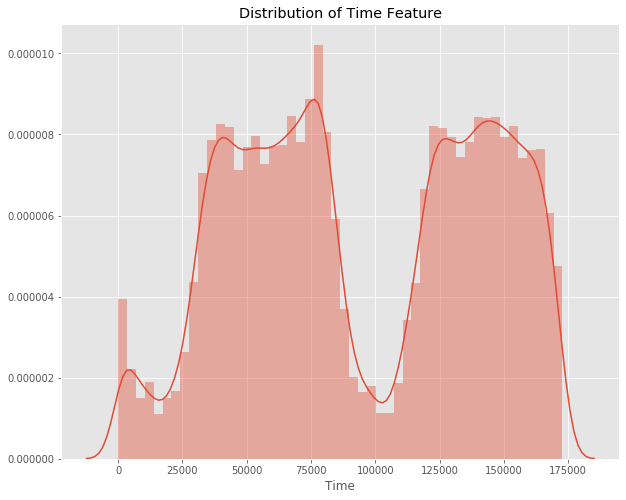

In [3]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

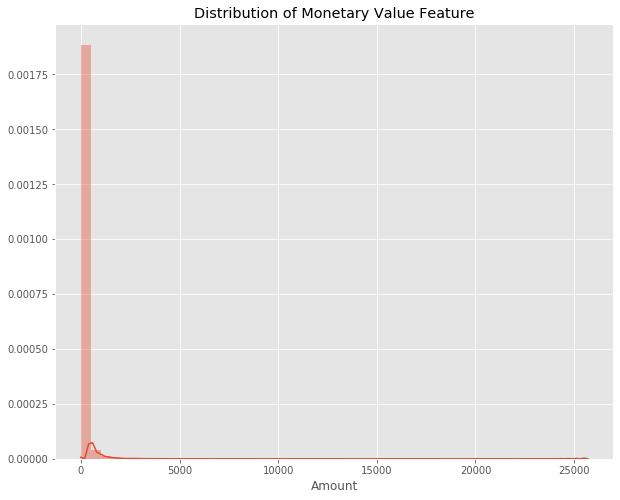

In [4]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [5]:
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

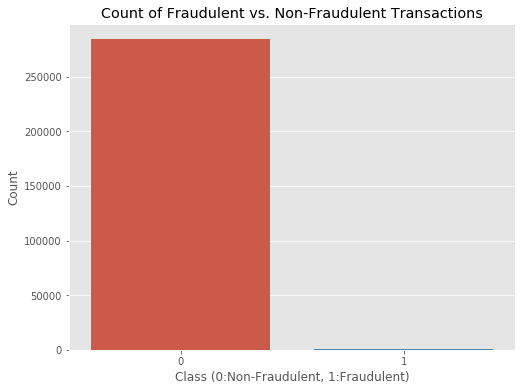

In [6]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [15]:
non_fraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

no_of_frauds = df.Class.value_counts()[1]

selected = non_fraud.sample(no_of_frauds)
selected.head()

selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

subsample = pd.concat([selected, fraud])
len(subsample)


984

In [16]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,17220.0,1.190,0.942,0.082,3.024,0.412,-0.214,0.054,-0.110,0.884,...,-0.503,-1.047,-0.057,-0.341,0.541,-0.098,-0.003,0.050,3.79,1
1,53937.0,-2.043,1.574,-2.373,-0.573,-2.097,-0.174,-3.040,-1.634,-0.595,...,-0.723,0.501,-0.697,-0.601,0.128,-0.786,0.606,0.172,261.87,1
2,36318.0,1.263,-1.124,-1.201,-1.553,1.326,3.475,-1.004,0.806,-0.587,...,-0.016,-0.324,-0.154,1.035,0.682,-0.239,-0.002,0.023,106.40,0
3,71097.0,1.188,-1.589,1.241,-1.162,-2.003,0.360,-1.573,0.226,-1.444,...,-0.089,0.162,0.024,0.239,0.114,-0.207,0.081,0.038,98.00,0
4,163650.0,1.968,-0.461,-0.444,0.161,-0.642,-0.294,-0.703,0.202,1.390,...,-0.106,-0.289,0.331,-0.510,-0.436,-0.911,0.045,-0.045,1.00,0
5,93853.0,-6.186,7.103,-13.030,8.011,-7.885,-3.975,-12.230,4.971,-4.248,...,2.503,0.482,0.481,0.360,-0.293,-0.199,-0.204,0.399,44.90,1
6,57367.0,-2.056,1.207,0.279,-0.497,-0.009,-0.358,0.113,0.794,-1.102,...,-0.268,-0.840,0.228,-0.262,0.128,0.905,-0.343,-0.070,25.90,0
7,28242.0,-2.787,-0.071,-1.505,3.362,-3.357,0.566,0.304,0.967,-2.246,...,0.883,-0.246,1.752,0.220,0.156,-0.266,0.221,0.256,730.86,1
8,62080.0,-1.599,2.608,-2.987,3.064,-2.498,-0.541,-2.278,1.268,-1.997,...,0.663,0.184,-0.089,-0.506,-0.062,-0.053,0.323,0.135,180.00,1
9,17838.0,-5.188,6.968,-13.511,8.618,-11.214,0.672,-9.463,5.329,-4.897,...,2.086,0.760,0.717,-0.647,-1.617,0.172,0.627,-0.170,766.36,1


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

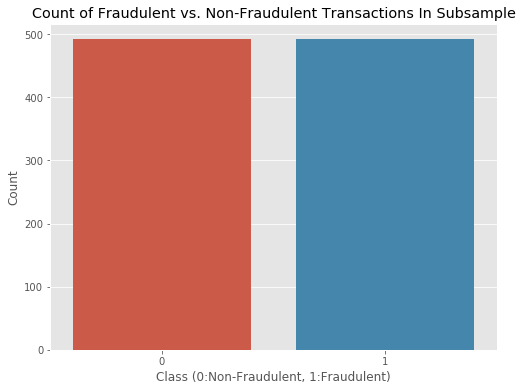

In [17]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [18]:
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
Time,-0.160
V1,-0.424
V2,0.491
V3,-0.566
V4,0.708
V5,-0.384
V6,-0.410
V7,-0.481
V8,0.052
V9,-0.557


In [19]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.566
V9,-0.557
V10,-0.627
V12,-0.682
V14,-0.752
V16,-0.597
V17,-0.558


In [20]:

#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.708
V11,0.690
Class,1.000


Text(0.5, 1, 'Heatmap of Correlation')

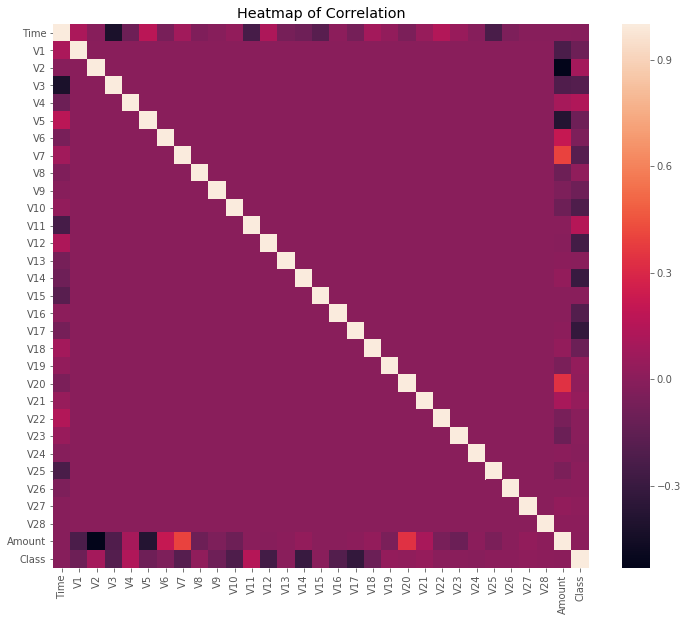

In [21]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')